### Example for DNN with the IMDB dataset (including regularization)

Loading the dataset and checking dimensions

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data.shape, test_data.shape)
print(len(train_labels), len(test_labels))
print(train_data[0])
print(train_labels[0])

(25000,) (25000,)
25000 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


Exploring and pre-processing the dataset

In [3]:
print(max([max(sequence) for sequence in train_data]))

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[2]])
print(decoded_review)

9999
? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life


In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Defining the model structure

In [6]:
from tensorflow.keras import models, layers

hidden = 16

model = models.Sequential()
model.add(layers.Dense(hidden, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(hidden, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Training the model and plotting errors along the process

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5112 - acc: 0.7814 - val_loss: 0.3783 - val_acc: 0.8676
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3055 - acc: 0.8995 - val_loss: 0.3047 - val_acc: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2295 - acc: 0.9259 - val_loss: 0.2982 - val_acc: 0.8812
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1865 - acc: 0.9367 - val_loss: 0.2767 - val_acc: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1533 - acc: 0.9509 - val_loss: 0.2881 - val_acc: 0.8827
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1299 - acc: 0.9582 - val_loss: 0.3123 - val_acc: 0.8777
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1111 - acc: 0.9659 - val_loss: 0.3029 - val_acc: 0.8833
Epoch 8/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0899 - a

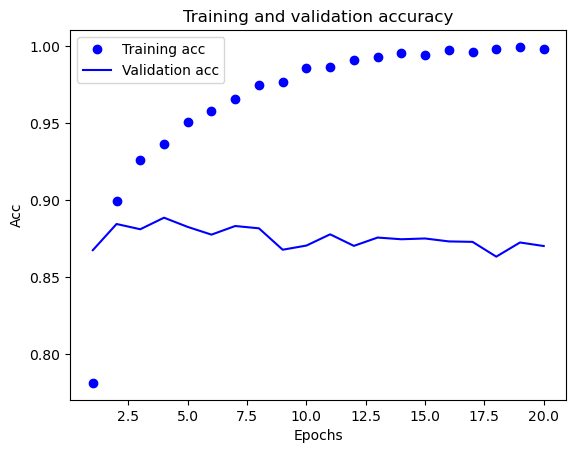

In [8]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()


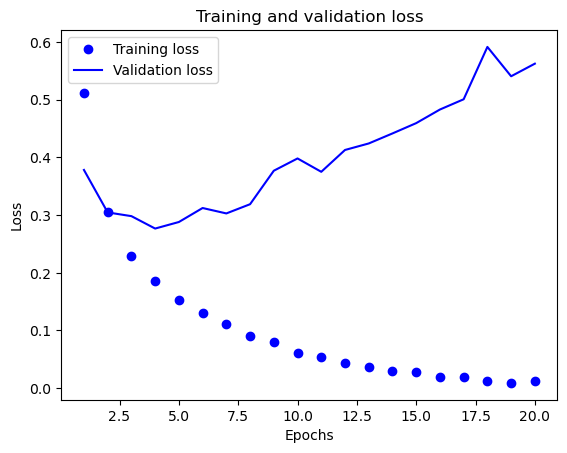

In [9]:
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Predicting for the test set and calculating errors

In [10]:
preds = model.predict(x_test) # probabilities
class_preds = preds > 0.5

print(preds[0:5])
class_preds[0:5]

782/782 [==============================] - 1s 1ms/step
[[0.01544716]
 [0.9999988 ]
 [0.7735969 ]
 [0.8879674 ]
 [0.9942616 ]]


array([[False],
       [ True],
       [ True],
       [ True],
       [ True]])

In [11]:
results = model.evaluate(x_test, y_test, verbose = 0)
results

[0.602630078792572, 0.860319972038269]

Overfitting - controlling capacity of the model

Epoch 1/20
30/30 [==============================] - 4s 100ms/step - loss: 0.5767 - acc: 0.7500 - val_loss: 0.4920 - val_acc: 0.8360
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4211 - acc: 0.8823 - val_loss: 0.4047 - val_acc: 0.8607
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3311 - acc: 0.9111 - val_loss: 0.3450 - val_acc: 0.8818
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2732 - acc: 0.9242 - val_loss: 0.3169 - val_acc: 0.8839
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2317 - acc: 0.9361 - val_loss: 0.2916 - val_acc: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2011 - acc: 0.9435 - val_loss: 0.2812 - val_acc: 0.8907
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1761 - acc: 0.9507 - val_loss: 0.2764 - val_acc: 0.8889
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1575 - 

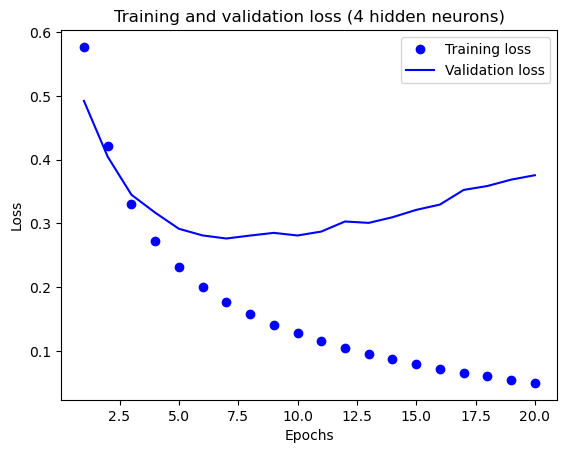

In [12]:
hidden = 4

model2 = models.Sequential()
model2.add(layers.Dense(hidden, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(hidden, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results2 = model2.evaluate(x_test, y_test, verbose = 0)
print(results2)

history_dict2 = history2.history
loss_values2 = history_dict2['loss'] 
val_loss_values2 = history_dict2['val_loss']

plt.plot(epochs, loss_values2, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss (4 hidden neurons)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5220 - acc: 0.7415 - val_loss: 0.3570 - val_acc: 0.8702
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3004 - acc: 0.8899 - val_loss: 0.3496 - val_acc: 0.8500
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2317 - acc: 0.9143 - val_loss: 0.2804 - val_acc: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1890 - acc: 0.9295 - val_loss: 0.2753 - val_acc: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1514 - acc: 0.9448 - val_loss: 0.2840 - val_acc: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1185 - acc: 0.9593 - val_loss: 0.4054 - val_acc: 0.8562
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1045 - acc: 0.9631 - val_loss: 0.3256 - val_acc: 0.8799
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0856 - a

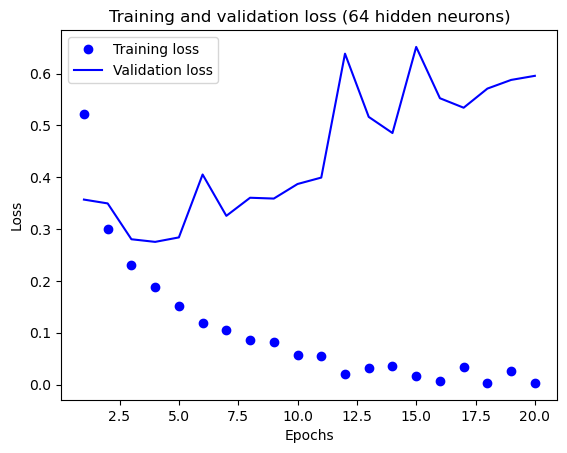

In [13]:
hidden = 64

model3 = models.Sequential()
model3.add(layers.Dense(hidden, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(hidden, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


results3 = model3.evaluate(x_test, y_test, verbose = 0)
print(results3)

history_dict3 = history3.history
loss_values3 = history_dict3['loss'] 
val_loss_values3 = history_dict3['val_loss']

plt.plot(epochs, loss_values3, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values3, 'b', label='Validation loss')
plt.title('Training and validation loss (64 hidden neurons)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

L2 regularization 

Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.5812 - acc: 0.7761 - val_loss: 0.4646 - val_acc: 0.8551
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3854 - acc: 0.8942 - val_loss: 0.3703 - val_acc: 0.8837
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3096 - acc: 0.9150 - val_loss: 0.3494 - val_acc: 0.8812
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2722 - acc: 0.9253 - val_loss: 0.3320 - val_acc: 0.8880
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2455 - acc: 0.9355 - val_loss: 0.3364 - val_acc: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2262 - acc: 0.9443 - val_loss: 0.3320 - val_acc: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2107 - acc: 0.9491 - val_loss: 0.3495 - val_acc: 0.8816
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2020 - a

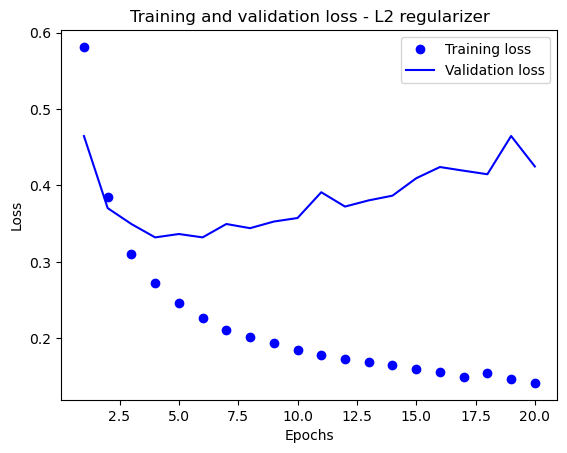

[0.4448673725128174, 0.8659200072288513]

In [14]:
from tensorflow.keras import regularizers

hidden = 16

model_l2 = models.Sequential()
model_l2.add(layers.Dense(hidden, activation='relu', kernel_regularizer=regularizers.l2(0.001),
                       input_shape=(10000,)))
model_l2.add(layers.Dense(hidden, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_l2.add(layers.Dense(1, activation='sigmoid'))

model_l2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_l2 = model_l2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_l2_dict = history_l2.history
loss_values_l2 = history_l2_dict['loss'] 
val_loss_values_l2 = history_l2_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values_l2, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_l2, 'b', label='Validation loss')
plt.title('Training and validation loss - L2 regularizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results_l2 = model_l2.evaluate(x_test, y_test, verbose = 0)
results_l2

Dropout

Epoch 1/10
30/30 [==============================] - 2s 43ms/step - loss: 0.6410 - acc: 0.6214 - val_loss: 0.5153 - val_acc: 0.8422
Epoch 2/10
30/30 [==============================] - 1s 17ms/step - loss: 0.5175 - acc: 0.7522 - val_loss: 0.4261 - val_acc: 0.8498
Epoch 3/10
30/30 [==============================] - 1s 17ms/step - loss: 0.4333 - acc: 0.8215 - val_loss: 0.3407 - val_acc: 0.8788
Epoch 4/10
30/30 [==============================] - 1s 17ms/step - loss: 0.3675 - acc: 0.8577 - val_loss: 0.3026 - val_acc: 0.8859
Epoch 5/10
30/30 [==============================] - 0s 16ms/step - loss: 0.3165 - acc: 0.8865 - val_loss: 0.2796 - val_acc: 0.8877
Epoch 6/10
30/30 [==============================] - 1s 17ms/step - loss: 0.2830 - acc: 0.8991 - val_loss: 0.2808 - val_acc: 0.8857
Epoch 7/10
30/30 [==============================] - 1s 19ms/step - loss: 0.2477 - acc: 0.9142 - val_loss: 0.2744 - val_acc: 0.8904
Epoch 8/10
30/30 [==============================] - 1s 17ms/step - loss: 0.2258 - a

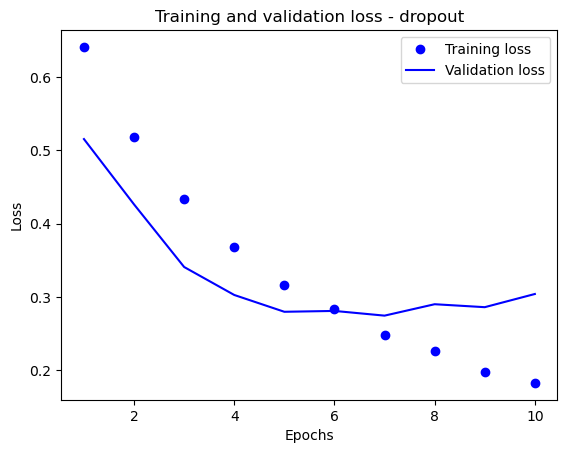

[0.3208467662334442, 0.881600022315979]

In [15]:
model_dr = models.Sequential()
model_dr.add(layers.Dense(hidden, activation='relu', input_shape=(10000,)))
model_dr.add(layers.Dropout(0.5))
model_dr.add(layers.Dense(hidden, activation='relu'))
model_dr.add(layers.Dropout(0.5))
model_dr.add(layers.Dense(1, activation='sigmoid'))

model_dr.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_dr = model_dr.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dr_dict = history_dr.history
loss_values_dr = history_dr_dict['loss'] 
val_loss_values_dr = history_dr_dict['val_loss']
epochs = range(1, len(loss_values_dr) + 1)

plt.plot(epochs, loss_values_dr, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_dr, 'b', label='Validation loss')
plt.title('Training and validation loss - dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results_dr = model_dr.evaluate(x_test, y_test, verbose = 0)
results_dr

Early Stopping

Epoch 1/20
30/30 [==============================] - 2s 59ms/step - loss: 0.5395 - acc: 0.7765 - val_loss: 0.4151 - val_acc: 0.8642
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3421 - acc: 0.8914 - val_loss: 0.3332 - val_acc: 0.8779
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2601 - acc: 0.9133 - val_loss: 0.2912 - val_acc: 0.8882
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2111 - acc: 0.9312 - val_loss: 0.2946 - val_acc: 0.8829
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1780 - acc: 0.9420 - val_loss: 0.2744 - val_acc: 0.8885
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1531 - acc: 0.9507 - val_loss: 0.2795 - val_acc: 0.8880
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1333 - acc: 0.9581 - val_loss: 0.2894 - val_acc: 0.8868
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1144 - a

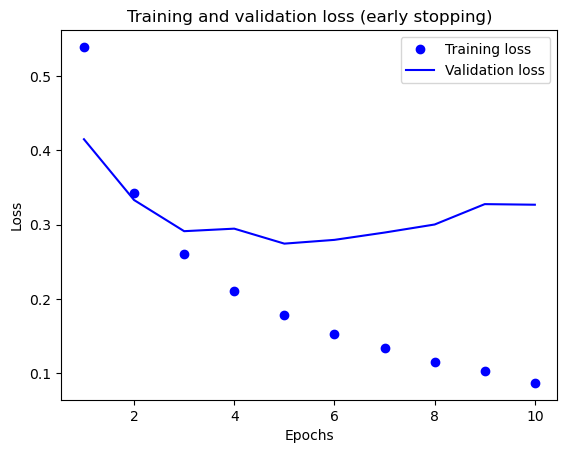

[0.3526243269443512, 0.8712000250816345]

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

hidden = 16

model = models.Sequential()
model.add(layers.Dense(hidden, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(hidden, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

early = EarlyStopping(monitor='val_loss', min_delta=0, patience= 5, verbose= True, mode='auto')

callbacks = [early]
history_es = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks = callbacks)

history_dict_es = history_es.history
loss_values_es = history_dict_es['loss'] 
val_loss_values_es = history_dict_es['val_loss']
epochs = range(1, len(loss_values_es) + 1)

plt.plot(epochs, loss_values_es, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_es, 'b', label='Validation loss')
plt.title('Training and validation loss (early stopping)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results_es = model.evaluate(x_test, y_test, verbose = 0)
results_es